## **Chicago Crime Data Analysis** ##

In [57]:
# Install required packages
# %pip install gdown dask pyarrow

## **Dataset Setup and Loading**

In [2]:
# Import the necessary libraries
import gdown
import zipfile


#libraries for data wrangling
import pandas as pd
import numpy as np

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns


# import dask.dataframe as dd

In [3]:
#set up views
pd.set_option('display.max_columns', None)
pd.set_option("display.width", 1000)

In [60]:
# Download dataset from Google Drive
# rawlink= "https://drive.google.com/file/d/1ib1PWK_3oaaSfThqfnfSoPZq7vA1g33X/view?usp=sharing"
# file_id = "1ib1PWK_3oaaSfThqfnfSoPZq7vA1g33X"
# output = "crime.zip"
# gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False)

In [61]:
# with zipfile.ZipFile(output, "r") as z:
#     # List files
#     print(z.namelist())
#     z.extractall("crime_data")

In [4]:
# Explicitly defining data types for each column in the Crimes dataset to reduce memory usage
dtypes_dict = {
    'ID': 'Int32',                 
    'Case Number': 'string',        
    'Block': 'string',              
    'IUCR': 'string',              
    'Primary Type': 'category',    
    'Description': 'category',      
    'Location Description': 'category', 
    'Arrest': 'boolean',              
    'Domestic': 'boolean',             
    'Beat': 'Int16',                
    'District': 'Int8',             
    'Ward': 'Int8',                
    'Community Area': 'Int8',      
    'FBI Code': 'category',         
    'X Coordinate': 'float32',      
    'Y Coordinate': 'float32',     
    'Year': 'float64',             
    'Latitude': 'float32',         
    'Longitude': 'float32',        
    'Location': 'string'            
}

crime_data = pd.read_csv(
    "crime_data/Crimes_-_2001_to_Present.csv",
    dtype=dtypes_dict,
    parse_dates=['Date', 'Updated On'],
    date_format="%m/%d/%Y %I:%M:%S %p",
    keep_default_na=True,
    low_memory=False
)



# Preview the first 5 rows of the dataset
crime_data.head()


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9,12,61,08B,1165074.0,1875917.0,2015.0,2018-02-10 15:50:01,41.815117,-87.669998,"(41.815117282, -87.669999562)"
1,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15,29,25,06,1138875.0,1904869.0,2015.0,2018-02-10 15:50:01,41.895081,-87.765404,"(41.895080471, -87.765400451)"
2,11646166,JC213529,2018-09-01 00:01:00,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6,8,44,06,NaN,NaN,2018.0,2019-04-06 16:04:43,NaN,NaN,<NA>
3,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14,35,21,18,1152037.0,1920384.0,2015.0,2018-02-10 15:50:01,41.937405,-87.716652,"(41.937405765, -87.716649687)"
4,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15,28,25,08A,1141706.0,1900086.0,2015.0,2018-02-10 15:50:01,41.881905,-87.755119,"(41.881903443, -87.755121152)"


## **Preliminary Data Analysis**

In [5]:
# copying the data into a new variable for wrangling
crime_data2 = crime_data.copy()
crime_data2.head(1)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9,12,61,08B,1165074.0,1875917.0,2015.0,2018-02-10 15:50:01,41.815117,-87.669998,"(41.815117282, -87.669999562)"


In [6]:
crime_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7784664 entries, 0 to 7784663
Data columns (total 22 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    Int32         
 1   Case Number           string        
 2   Date                  datetime64[ns]
 3   Block                 string        
 4   IUCR                  string        
 5   Primary Type          category      
 6   Description           category      
 7   Location Description  category      
 8   Arrest                boolean       
 9   Domestic              boolean       
 10  Beat                  Int16         
 11  District              Int8          
 12  Ward                  Int8          
 13  Community Area        Int8          
 14  FBI Code              category      
 15  X Coordinate          float32       
 16  Y Coordinate          float32       
 17  Year                  float64       
 18  Updated On            datetime64[ns]
 19  

In [7]:
# Checking the  data types
crime_data2.dtypes

ID                               Int32
Case Number             string[python]
Date                    datetime64[ns]
Block                   string[python]
IUCR                    string[python]
Primary Type                  category
Description                   category
Location Description          category
Arrest                         boolean
Domestic                       boolean
Beat                             Int16
District                          Int8
Ward                              Int8
Community Area                    Int8
FBI Code                      category
X Coordinate                   float32
Y Coordinate                   float32
Year                           float64
Updated On              datetime64[ns]
Latitude                       float32
Longitude                      float32
Location                string[python]
dtype: object

In [8]:
# Check column names
crime_data2.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude', 'Location'], dtype='object')

In [9]:
# Preview first 5 rows
crime_data2.head()


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9,12,61,08B,1165074.0,1875917.0,2015.0,2018-02-10 15:50:01,41.815117,-87.669998,"(41.815117282, -87.669999562)"
1,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15,29,25,06,1138875.0,1904869.0,2015.0,2018-02-10 15:50:01,41.895081,-87.765404,"(41.895080471, -87.765400451)"
2,11646166,JC213529,2018-09-01 00:01:00,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6,8,44,06,NaN,NaN,2018.0,2019-04-06 16:04:43,NaN,NaN,<NA>
3,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14,35,21,18,1152037.0,1920384.0,2015.0,2018-02-10 15:50:01,41.937405,-87.716652,"(41.937405765, -87.716649687)"
4,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15,28,25,08A,1141706.0,1900086.0,2015.0,2018-02-10 15:50:01,41.881905,-87.755119,"(41.881903443, -87.755121152)"


In [10]:
# Rename all columns to lowercase and replace spaces with underscores
crime_data2= crime_data2.rename(columns=lambda x: x.strip().lower().replace(" ", "_"))

In [11]:
# Preview updated column names
crime_data2.columns

Index(['id', 'case_number', 'date', 'block', 'iucr', 'primary_type', 'description', 'location_description', 'arrest', 'domestic', 'beat', 'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate', 'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude', 'location'], dtype='object')

In [12]:
# Converting the date to datetime
crime_data2['date'] = pd.to_datetime(crime_data2['date'])

In [13]:
crime_data_type= crime_data2['date'].dtypes
print("Data type\n:", crime_data_type)

Data type
: datetime64[ns]


In [14]:
crime_data2['updated_on'] = pd.to_datetime(crime_data2['updated_on'])

In [15]:
updated_date_data_type= crime_data2['updated_on'].dtypes
print("Updated Date Data type\n:", updated_date_data_type)

Updated Date Data type
: datetime64[ns]


In [16]:
crime_data2.head()

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9,12,61,08B,1165074.0,1875917.0,2015.0,2018-02-10 15:50:01,41.815117,-87.669998,"(41.815117282, -87.669999562)"
1,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15,29,25,06,1138875.0,1904869.0,2015.0,2018-02-10 15:50:01,41.895081,-87.765404,"(41.895080471, -87.765400451)"
2,11646166,JC213529,2018-09-01 00:01:00,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6,8,44,06,NaN,NaN,2018.0,2019-04-06 16:04:43,NaN,NaN,<NA>
3,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14,35,21,18,1152037.0,1920384.0,2015.0,2018-02-10 15:50:01,41.937405,-87.716652,"(41.937405765, -87.716649687)"
4,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15,28,25,08A,1141706.0,1900086.0,2015.0,2018-02-10 15:50:01,41.881905,-87.755119,"(41.881903443, -87.755121152)"


**Analyzing the missing data**

_____________________

Missing DATA ANALYSIS
_____________________
                                   Columns  Missing_count  Missing_percentage       Data_type
ward                                  ward         614848            7.898196            Int8
community_area              community_area         613476            7.880571            Int8
longitude                        longitude          86848            1.115629         float32
latitude                          latitude          86848            1.115629         float32
x_coordinate                  x_coordinate          86848            1.115629         float32
y_coordinate                  y_coordinate          86848            1.115629         float32
location                          location          86848            1.115629  string[python]
location_description  location_description          10381            0.133352        category
district                          district             47            0.000604          

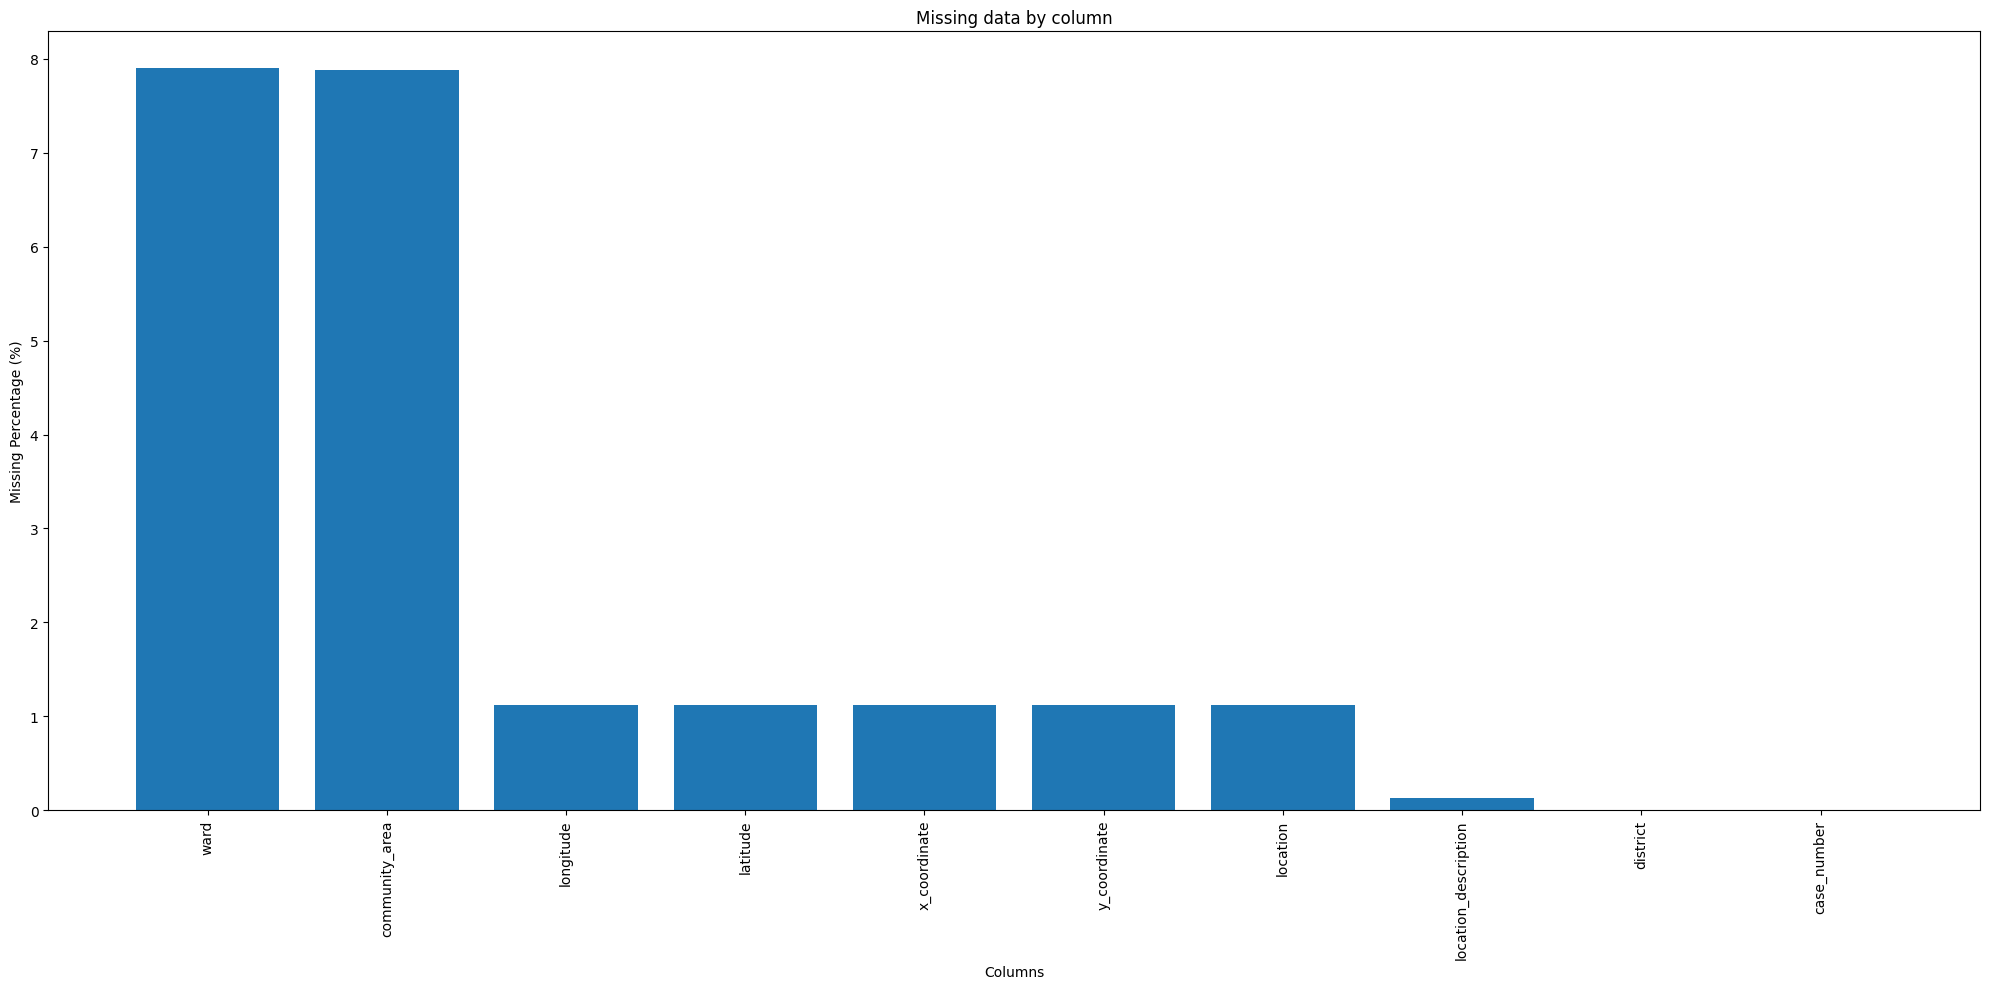

In [17]:
# Defining a function to analyze the missing data
def missing_data(crime_data2):
    """Analyzing missing data in the dataset"""

    missing_data = pd.DataFrame({
            'Columns': crime_data2.columns,
            'Missing_count': crime_data2.isnull().sum(),
            'Missing_percentage': (crime_data2.isnull().sum()/ len(crime_data2) * 100),
            'Data_type': crime_data2.dtypes
    })

    missing_data = missing_data[missing_data['Missing_count'] > 0]. sort_values('Missing_percentage', ascending=False)

    print('_____________________\n')
    print('Missing DATA ANALYSIS')
    print('_____________________')

    print(missing_data)
    # Visualizing missing data
    plt.figure(figsize=(20,10))
    plt.bar(missing_data['Columns'], missing_data['Missing_percentage'])
    plt.title('Missing data by column')
    plt.xlabel('Columns')
    plt.ylabel('Missing Percentage (%)')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

missing_data(crime_data2)

In [18]:
# checking for missing values
crime_data2.isnull().sum()

id                           0
case_number                  4
date                         0
block                        0
iucr                         0
primary_type                 0
description                  0
location_description     10381
arrest                       0
domestic                     0
beat                         0
district                    47
ward                    614848
community_area          613476
fbi_code                     0
x_coordinate             86848
y_coordinate             86848
year                         0
updated_on                   0
latitude                 86848
longitude                86848
location                 86848
dtype: int64

In [19]:
# Dropping the missing values
crime_data2.dropna(inplace=True)


In [20]:
#Check for missing values in each column
crime_data.isna().sum()

ID                           0
Case Number                  4
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     10381
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614848
Community Area          613476
FBI Code                     0
X Coordinate             86848
Y Coordinate             86848
Year                         0
Updated On                   0
Latitude                 86848
Longitude                86848
Location                 86848
dtype: int64

In [21]:
# checking for duplicate values
crime_data2.duplicated().sum()

np.int64(0)

In [22]:

# checking for empty values
crime_data2.empty

False

## **Exploratory Data Analysis**

In [23]:
# checking the number of years of the data and converting the year column to Integer
crime_data2["year"] = crime_data2["year"].astype("int").astype("int")

In [24]:
# checking the years in the dataset
crime_data_years= crime_data2["year"].unique()
print(f"The years in the dataset are\n{crime_data_years}")

The years in the dataset are
[2015 2014 2020 2019 2021 2012 2011 2013 2010 2017 2018 2016 2008 2007
 2009 2023 2022 2006 2005 2002 2001 2003 2004]


In [25]:
# checking the number of unique years in the data
crime_data_years_no= crime_data2["year"].nunique()
print(f"Chicago crime dataset for {crime_data_years_no} years\n")

Chicago crime dataset for 23 years



In [26]:
# Checking the size of the dataset
crime_data2.shape

(7084435, 22)

In [27]:
crime_data2.info

<bound method DataFrame.info of                id case_number                date                block  iucr        primary_type                    description             location_description  arrest  domestic  beat  district  ward  community_area fbi_code  x_coordinate  y_coordinate  year          updated_on   latitude  longitude                       location
0        10224738    HY411648 2015-09-05 13:30:00      043XX S WOOD ST  0486             BATTERY        DOMESTIC BATTERY SIMPLE                        RESIDENCE   False      True   924         9    12              61      08B     1165074.0     1875917.0  2015 2018-02-10 15:50:01  41.815117 -87.669998  (41.815117282, -87.669999562)
1        10224739    HY411615 2015-09-04 11:30:00  008XX N CENTRAL AVE  0870               THEFT                 POCKET-PICKING                          CTA BUS   False     False  1511        15    29              25       06     1138875.0     1904869.0  2015 2018-02-10 15:50:01  41.895081 -87.765404 

## Descriptive Analysis (Numerical variables)
- Using the .describe() function.

In [28]:
# Select numeric columns only 
numeric_cols = crime_data.select_dtypes(include=["number"]).columns

# checking the statistical summary of the data
numeric_summary = crime_data[numeric_cols].astype("float64").describe()

print("Numeric Summary",numeric_summary)



Numeric Summary                  ID          Beat      District          Ward  Community Area  X Coordinate  Y Coordinate          Year      Latitude     Longitude
count  7.784664e+06  7.784664e+06  7.784617e+06  7.169816e+06    7.171188e+06  7.697816e+06  7.697816e+06  7.784664e+06  7.697816e+06  7.697816e+06
mean   7.026439e+06  1.185918e+03  1.129466e+01  2.275420e+01    3.748472e+01  1.164601e+06  1.885783e+06  2.009944e+03  4.184218e+01 -8.767149e+01
std    3.502657e+06  7.031335e+02  6.952422e+00  1.385106e+01    2.154115e+01  1.684658e+04  3.227531e+04  6.260628e+00  8.879600e-02  6.108257e-02
min    6.340000e+02  1.110000e+02  1.000000e+00  1.000000e+00    0.000000e+00  0.000000e+00  0.000000e+00  2.001000e+03  3.661945e+01 -9.168657e+01
25%    3.792574e+06  6.210000e+02  6.000000e+00  1.000000e+01    2.300000e+01  1.152976e+06  1.859073e+06  2.005000e+03  4.176871e+01 -8.771367e+01
50%    7.029327e+06  1.034000e+03  1.000000e+01  2.300000e+01    3.200000e+01  1.166110e+06  1.8

In [29]:
# # extracting the year, month, week, day, hour, quarter and weekends from the dataset 
crime_data2["year"]= crime_data2['date'].dt.year
crime_data2["month"] = crime_data2["date"].dt.month_name()
crime_data2['day'] = crime_data2['date'].dt.day
crime_data2['hour'] = crime_data2['date'].dt.hour
crime_data2['day_of_week'] = crime_data2['date'].dt.dayofweek  # 0=Monday, 6=Sunday
crime_data2['day_name'] = crime_data2['date'].dt.day_name()
crime_data2['month_name'] = crime_data2['date'].dt.month_name()
crime_data2['quarter'] = crime_data2['date'].dt.quarter
crime_data2['weekend'] = crime_data2['day_of_week'].isin([5, 6])#Saturday and Sunday

# Time periods
crime_data2['time_period'] = pd.cut(crime_data2['hour'], 
                              bins=[0, 6, 12, 18, 24], 
                              labels=['Night', 'Morning', 'Afternoon', 'Evening'],
                              include_lowest=True)

# Applying the new date features to the dataset
print("Data Extracted Successfully,New Columns added\n")
crime_data2.head()

Data Extracted Successfully,New Columns added



,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location,month,day,hour,day_of_week,day_name,month_name,quarter,weekend,time_period
0,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9,12,61,08B,1165074.0,1875917.0,2015,2018-02-10 15:50:01,41.815117,-87.669998,"(41.815117282, -87.669999562)",September,5,13,5,Saturday,September,3,True,Afternoon
1,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15,29,25,06,1138875.0,1904869.0,2015,2018-02-10 15:50:01,41.895081,-87.765404,"(41.895080471, -87.765400451)",September,4,11,4,Friday,September,3,False,Morning
3,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14,35,21,18,1152037.0,1920384.0,2015,2018-02-10 15:50:01,41.937405,-87.716652,"(41.937405765, -87.716649687)",September,5,12,5,Saturday,September,3,True,Morning
4,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15,28,25,08A,1141706.0,1900086.0,2015,2018-02-10 15:50:01,41.881905,-87.755119,"(41.881903443, -87.755121152)",September,5,13,5,Saturday,September,3,True,Afternoon
5,10224742,HY411435,2015-09-05 10:55:00,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,614,6,21,71,05,1168430.0,1850165.0,2015,2018-02-10 15:50:01,41.744377,-87.658432,"(41.744378879, -87.658430635)",September,5,10,5,Saturday,September,3,True,Morning


In [30]:
# checking the columns in the dataset for the new columns added
crime_data2.columns

Index(['id', 'case_number', 'date', 'block', 'iucr', 'primary_type', 'description', 'location_description', 'arrest', 'domestic', 'beat', 'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate', 'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude', 'location', 'month', 'day', 'hour', 'day_of_week', 'day_name', 'month_name', 'quarter', 'weekend', 'time_period'], dtype='object')

# Certain Crimes in the last ten years

In [31]:
# Filter the dataset for the last 10 years (2013–2023)
crime_ten_yrs = crime_data2[crime_data2["year"] >= 2013]
crime_ten_yrs.tail(1000)

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location,month,day,hour,day_of_week,day_name,month_name,quarter,weekend,time_period
7783640,12746978,JF299906,2022-06-30 12:40:00,012XX W AINSLIE ST,1330,CRIMINAL TRESPASS,TO LAND,LIBRARY,False,False,2033,20,46,3,26,1167282.0,1932906.0,2022,2023-01-03 15:46:28,41.971451,-87.660263,"(41.971452044, -87.660260415)",June,30,12,3,Thursday,June,2,False,Morning
7783641,12751810,JF306301,2022-07-05 14:18:00,055XX S AUSTIN AVE,0810,THEFT,OVER $500,STREET,False,False,811,8,13,56,06,1137317.0,1867128.0,2022,2023-01-03 15:46:28,41.791542,-87.772026,"(41.791541614, -87.772028588)",July,5,14,1,Tuesday,July,3,False,Afternoon
7783642,12742831,JF295440,2022-06-27 02:06:00,022XX S MICHIGAN AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True,132,1,3,33,08B,1177561.0,1889490.0,2022,2023-01-03 15:46:28,41.852089,-87.623787,"(41.852089006, -87.623784345)",June,27,2,0,Monday,June,2,False,Night
7783643,12740904,JF292906,2022-06-24 20:26:00,063XX S WOOD ST,3710,INTERFERENCE WITH PUBLIC OFFICER,RESIST / OBSTRUCT / DISARM OFFICER,STREET,True,False,725,7,15,67,24,1165431.0,1862554.0,2022,2023-01-03 15:46:28,41.778439,-87.669067,"(41.778440025, -87.669068807)",June,24,20,4,Friday,June,2,False,Evening
7783644,12745770,JF298936,2022-06-23 12:00:00,015XX W WELLINGTON AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,APARTMENT,False,False,1932,19,32,6,11,1165599.0,1920000.0,2022,2023-01-03 15:46:28,41.936073,-87.666817,"(41.936073524, -87.666818076)",June,23,12,3,Thursday,June,2,False,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7784659,12847575,JF420478,2022-09-01 05:00:00,005XX W SURF ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,1934,19,44,6,26,1172497.0,1919410.0,2022,2023-01-03 15:46:28,41.934303,-87.641487,"(41.934304581, -87.641484982)",September,1,5,3,Thursday,September,3,False,Night
7784660,12847801,JF420319,2022-07-08 00:00:00,114XX S PRAIRIE AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,STREET,False,False,531,5,9,49,11,1179966.0,1828818.0,2022,2023-01-03 15:46:28,41.685543,-87.616814,"(41.685543881, -87.616812541)",July,8,0,4,Friday,July,3,False,Night
7784661,12847324,JF420102,2022-09-27 11:00:00,023XX E 70TH ST,0810,THEFT,OVER $500,RESIDENCE,False,False,331,3,5,43,06,1193181.0,1859005.0,2022,2023-01-03 15:46:28,41.768066,-87.567451,"(41.768068052, -87.567452932)",September,27,11,1,Tuesday,September,3,False,Morning
7784662,12847570,JF420427,2022-09-03 10:25:00,052XX W CARMEN AVE,2021,NARCOTICS,POSSESS - BARBITURATES,RESIDENCE - YARD (FRONT / BACK),True,False,1623,16,45,11,18,1140553.0,1933418.0,2022,2023-01-03 15:46:28,41.973392,-87.758537,"(41.973391184, -87.758534512)",September,3,10,5,Saturday,September,3,True,Morning


In [90]:
# Setting 'primary_type' as the index
# crime_ten_yrs = crime_ten_yrs.set_index("primary_type")

In [32]:

# Count how many unique crime types exist in the last 10years
unique_crime_ten_yrs = crime_ten_yrs["primary_type"].nunique()
print("\nThe Number of unique crime types recorded in (2013–2023):", unique_crime_ten_yrs)



The Number of unique crime types recorded in (2013–2023): 35


In [33]:
# Get the unique crime types within the last 10 years
unique_crime_types_ten_yrs = crime_ten_yrs["primary_type"].unique()
print("The Unique crime types recorded from 2013–2023:\n", unique_crime_types_ten_yrs)

The Unique crime types recorded from 2013–2023:
 ['BATTERY', 'THEFT', 'NARCOTICS', 'ASSAULT', 'BURGLARY', ..., 'OTHER NARCOTIC VIOLATION', 'NON-CRIMINAL', 'HOMICIDE', 'NON-CRIMINAL (SUBJECT SPECIFIED)', 'RITUALISM']
Length: 35
Categories (36, object): ['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY', ..., 'SEX OFFENSE', 'STALKING', 'THEFT', 'WEAPONS VIOLATION']


In [34]:

# Getting the number of counts of each crime type in the last 10 years
crime_type_counts_10 = crime_ten_yrs["primary_type"].value_counts()
print("\nCrime type counts (2013–2023):\n", crime_type_counts_10)


Crime type counts (2013–2023):
 primary_type
THEFT                                587482
BATTERY                              485255
CRIMINAL DAMAGE                      286193
ASSAULT                              196105
OTHER OFFENSE                        164922
DECEPTIVE PRACTICE                   160327
NARCOTICS                            154056
MOTOR VEHICLE THEFT                  124539
BURGLARY                             119081
ROBBERY                              100081
CRIMINAL TRESPASS                     62006
WEAPONS VIOLATION                     58174
OFFENSE INVOLVING CHILDREN            21703
PUBLIC PEACE VIOLATION                17232
SEX OFFENSE                           10451
INTERFERENCE WITH PUBLIC OFFICER      10397
CRIM SEXUAL ASSAULT                    8824
PROSTITUTION                           8270
HOMICIDE                               6421
CRIMINAL SEXUAL ASSAULT                5599
ARSON                                  4577
LIQUOR LAW VIOLATION          

# Data Visualization for all the crimes recorded in the last ten years

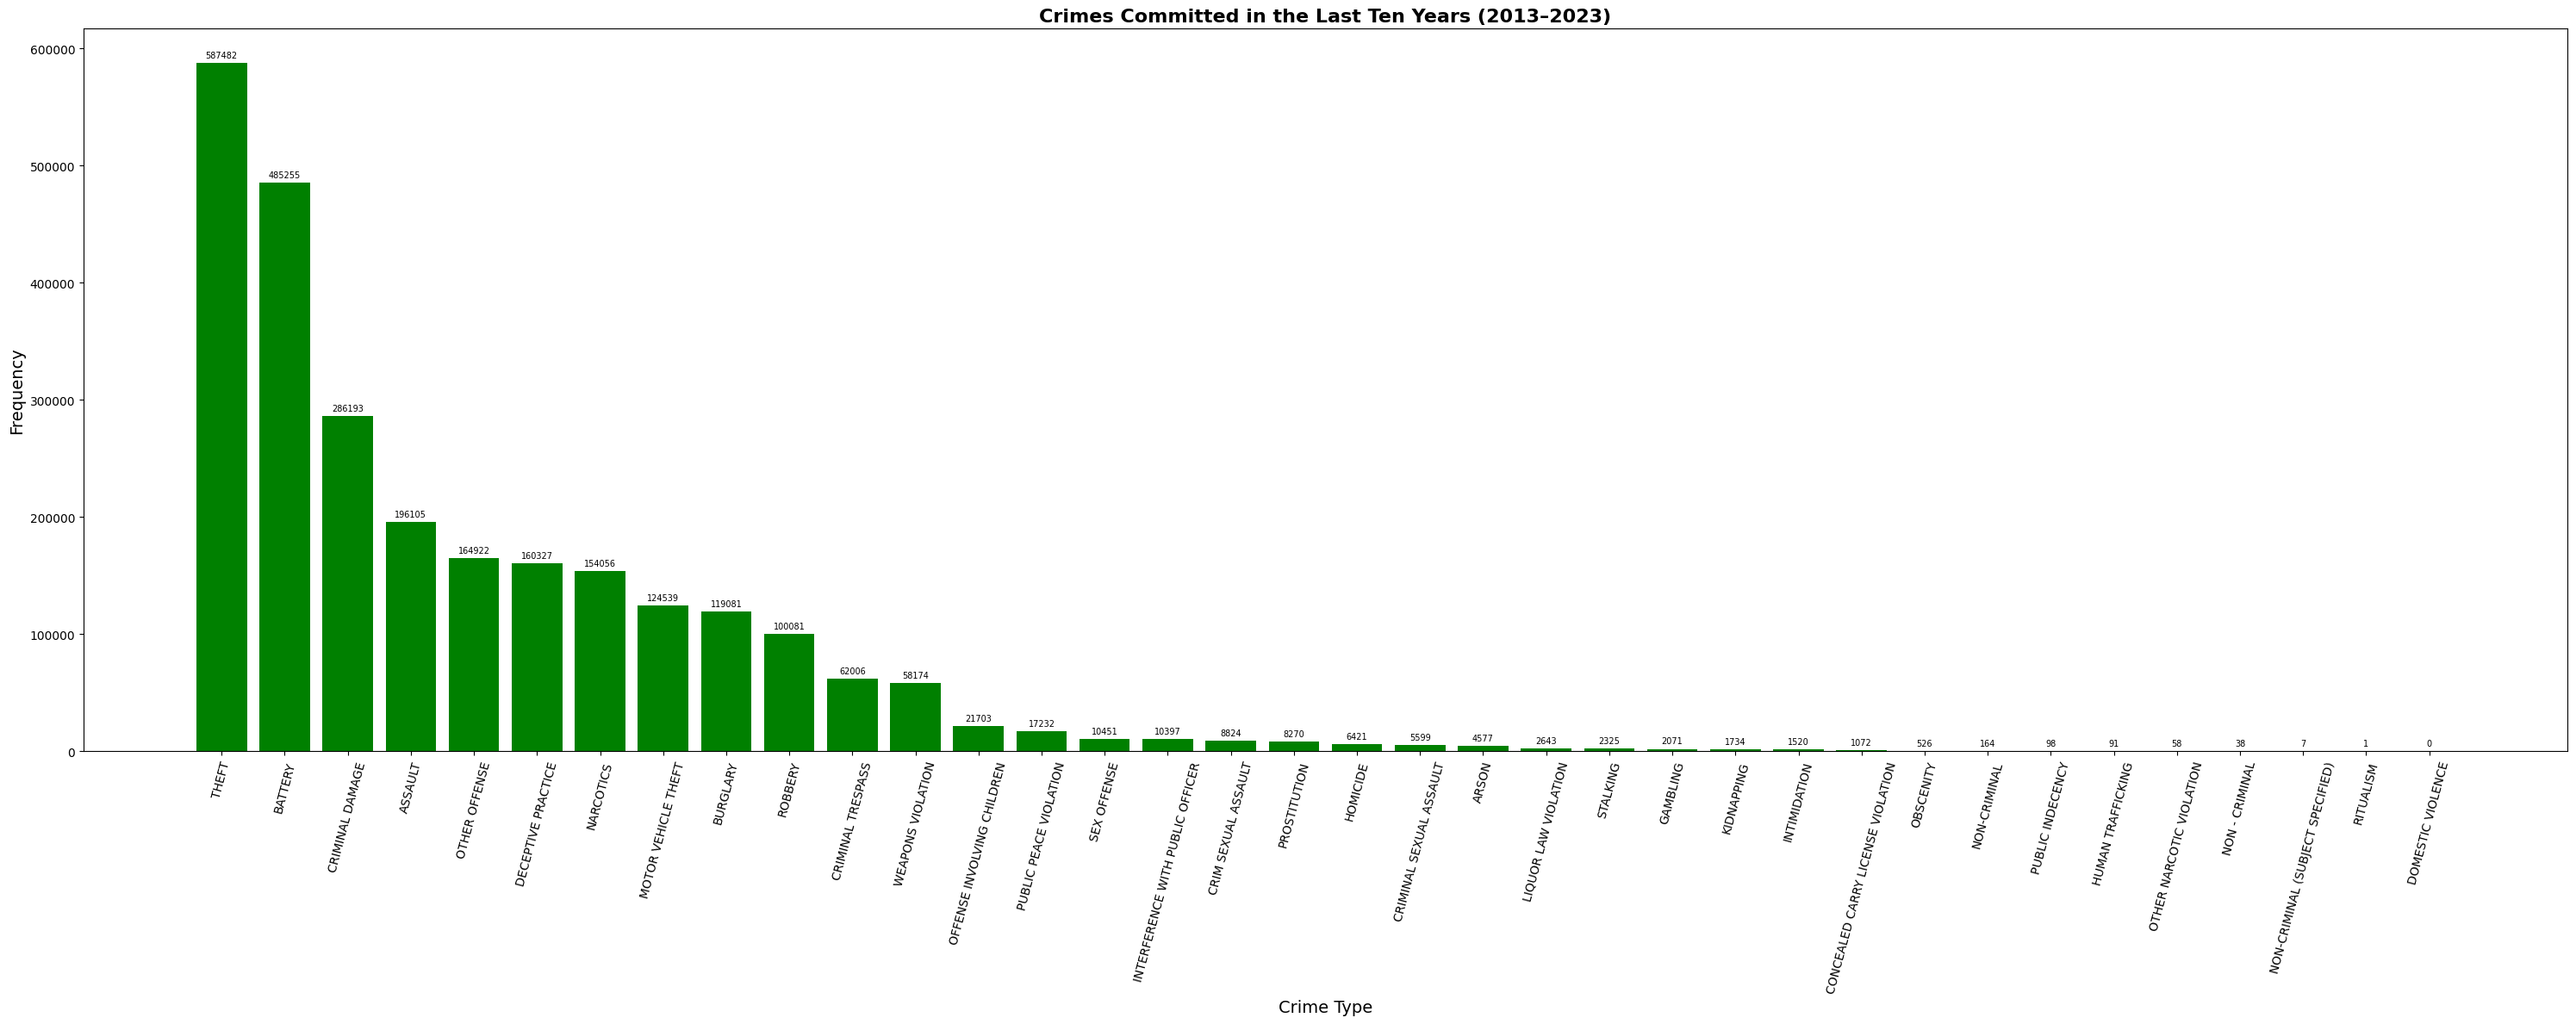

In [97]:
# Plot ALL crime categories
plt.figure(figsize=(30,12))   # Increased figure size for clarity
bars = plt.bar(crime_type_counts_10.index, crime_type_counts_10.values, color="green")

plt.xlabel("Crime Type", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Crimes Committed in the Last Ten Years (2013–2023)", weight="bold", fontsize=16)

plt.xticks(rotation=75, fontsize=10)   # rotate labels for better readability
plt.bar_label(bars, fmt="%.0f", padding=3, fontsize=7)  # keep values small but readable
plt.tight_layout()
plt.show()


In [35]:
# top 
# Count all crime types from the index
crime_type_counts = crime_ten_yrs.index.value_counts()
print("\nCrime type counts (2013–2023):\n", crime_type_counts)


Crime type counts (2013–2023):
 0          1
1          1
3          1
4          1
5          1
          ..
7784659    1
7784660    1
7784661    1
7784662    1
7784663    1
Name: count, Length: 2604043, dtype: int64


In [ ]:
# creating a bar chart
plt.figure(figsize = (24, 7))
bars = plt.bar(crime_type_counts.index, crime_type_counts.values, color="steelblue")
# Add chart title and labels
plt.title("Crime Type Counts (2013–2023)", fontsize=16, weight="bold")
plt.xlabel("Crime Type", fontsize=12)
plt.ylabel("Number of Records", fontsize=12)

# Rotate x labels for readability
plt.xticks(rotation=75, ha="right")

# Add labels on top of bars
plt.bar_label(bars, fmt="%.0f", padding=3)

# Improve layout
plt.tight_layout()

# Show chart
plt.show()

Exception ignored in: <function TransformNode.set_children.<locals>.<lambda> at 0x000002489179FEC0>
Traceback (most recent call last):
  File "c:\Users\SHOPINVERSE\Desktop\AI-fellowship-module-2\my_venv\Lib\site-packages\matplotlib\transforms.py", line 196, in <lambda>
    self, lambda _, pop=child._parents.pop, k=id_self: pop(k))
                                                       ^^^^^^
KeyboardInterrupt: 


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x00000248C0E90F40> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

# Top Ten Crimes in the Last Ten Years (2013-2023)

In [ ]:
# Sort crime counts and take Top 10
top_crimes = crime_ten_yrs['primary_type'].value_counts().sort_values(ascending=False).head(10)
print("Top ten crimes in the last ten years\n",top_crimes)

In [ ]:
# Create vertical bar chart
plt.figure(figsize=(10,6))
bars = plt.bar(top_crimes.index, top_crimes.values, color="#47b41f")

# Add chart title and labels
plt.title("Top 10 Crime Types Recorded (2013–2023)", fontsize=16, weight="bold")
plt.xlabel("Crime Type", fontsize=12)
plt.ylabel("Number of Records", fontsize=12)

# Rotate x labels
plt.xticks(rotation=45, ha="right")

# Add value labels on top of bars
plt.bar_label(bars, fmt="%.0f", padding=3)

# displaying chart
plt.show()

**Theft (2013-2023)**

In [ ]:
# selecting the theft in the last ten years
theft = top_crimes.loc["THEFT"]

In [ ]:
# Getting the number of counts of each crime theft in the last 10 years
theft_ten_yrs = crime_ten_yrs[crime_ten_yrs["primary_type"] == "THEFT"].value_counts()
print("\nTheft recorded from (2013–2023):\n", theft_ten_yrs)

In [ ]:
# grouping the theft by year
theft_grouped_by_10yr = theft_ten_yrs.groupby("year").sum().sort_values(ascending= True)
print("Theft by Year:\n",theft_grouped_by_10yr)

In [ ]:
#Grouping by year and count
theft_by_year = theft.groupby("year").size()

# Plotting the line chart
plt.figure(figsize=(10,6))
sns.lineplot(x=theft_by_year.index, y=theft_by_year.values, 
             marker="o", color="crimson", linewidth=2)

# Adding the chart details
plt.title("Theft Cases Recorded (2013–2023)", fontsize=16, weight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Thefts", fontsize=12)

# Add grid 
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()

**BATTERY (2013-2023)**

In [ ]:
# Checking the Battery in the last ten years
battery = top_crimes.loc['BATTERY']
print(f"Total BATTERY crime recorded: {battery}\n")# 

# Checking the battery in the last ten years
battery_ten_yrs = crime_ten_yrs[crime_ten_yrs['primary_type']=='BATTERY'].value_counts(ascending=True)
print(f"Battery recorded from 2013-2023\n {battery_ten_yrs}\n")

# Grouping the Battery by Year
battery_grouped_by_10years = battery_ten_yrs.groupby('year').sum().sort_values(ascending=True)
print("Battery by Year:\n",battery_grouped_by_10years)

**CRIMINAL DAMAGE (2013-2023)**

In [ ]:
# Checking the criminal_damagein the last ten years
criminal_damage = top_crimes.loc['CRIMINAL DAMAGE']
print(f"Total Criminal damage recorded: {criminal_damage}\n")

# Checking the criminal_damage in the last ten years
criminal_damage_ten_yrs = crime_ten_yrs[crime_ten_yrs['primary_type']=='CRIMINAL DAMAGE'].value_counts(ascending=True)
print(f"Criminal damage recorded from 2013-2023\n {criminal_damage_ten_yrs}\n")

# Grouping the criminal_damage by Year
criminal_damage_grouped_by_10years = criminal_damage_ten_yrs.groupby('year').sum().sort_values(ascending=True)
print("Criminal damage by Year:\n",criminal_damage_grouped_by_10years)

**ASSAULT (2013-2023)**

In [ ]:
# Checking the Assault in the last ten years
assault =top_crimes.loc['ASSAULT']
print(f"Total Assault recorded: {assault}\n")

# Checking the Assault in the last ten years
assault_ten_yrs = crime_ten_yrs[crime_ten_yrs['primary_type']=='ASSAULT'].value_counts(ascending=True)
print(f"Assault recorded from 2013-2023\n {assault_ten_yrs}\n")

# Grouping the Assault by Year
assault_grouped_by_10years = assault_ten_yrs.groupby('year').sum().sort_values(ascending=True)
print("Assault by Year:\n",assault_grouped_by_10years)

**OTHER OFFENSE (2013-2023)**

In [ ]:
# Checking the other offence in the last ten years
other_offence = top_crimes.loc['ASSAULT']
print(f"Total other offences recorded: {other_offence}\n")

# Checking the other offence  in the last ten years
other_off_ten_yrs = crime_ten_yrs[crime_ten_yrs['primary_type']=='ASSAULT'].value_counts(ascending=True)
print(f"Other offence  recorded from 2013-2023\n {other_off_ten_yrs}\n")

other_off_grouped_by_10years = assault_ten_yrs.groupby('year').sum().sort_values(ascending=True)
print("Other offence  by Year:\n", other_off_grouped_by_10years)

**DECEPTIVE PRACTICE (2013-2023)**

In [ ]:
# Checking the Deceptive Practice in the last ten years
decep_practice = top_crimes.loc['ASSAULT']
print(f"Total Deceptive Practice recorded: {decep_practice }\n")

# Checking the other offence  in the last ten years
decep_practice_ten_yrs = crime_ten_yrs[crime_ten_yrs['primary_type']=='ASSAULT'].value_counts(ascending=True)
print(f"Deceptive Practice recorded from 2013-2023\n {decep_practice_ten_yrs}\n")

decep_practice_grouped_by_10years = assault_ten_yrs.groupby('year').sum().sort_values(ascending=True)
print("Deceptive Practice  by Year:\n", decep_practice_grouped_by_10years)

In [ ]:
# Plotting all the top ten crimes recorded over the last ten years using matplolib
def create_crime_visualizations(crime_ten_yrs):
    
    """ create visualizations"""
    import matplotlib.pyplot as plt
    plt.style.use('seaborn-v0_8')
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Chicago Crime Data Analysis Dashboard', fontsize=16, fontweight='bold')

    # 1. Theft recorded over ten years
    theft_grouped_by_10yr.plot(kind='bar', ax=axes[0,0], color='red')
    axes[0,0].set_title('Theft over ten years')
    axes[0,0].set_xlabel('Theft by Year')
    axes[0,0].set_ylabel('Frequency')
    axes[0,0].grid(True, alpha=0.3)

    # 2. Battery recorded over ten years
    battery_grouped_by_10years.plot(kind='barh', ax=axes[0,1], color='black')
    axes[0,1].set_title('Battery over ten years')
    axes[0,1].set_xlabel('Battery by Year')
    axes[0,1].set_ylabel('Frequency')
    axes[0,1].grid(True, alpha=0.3)

    # 3. Criminal damage recorded over ten years
    criminal_damage_grouped_by_10years.plot(kind='barh', ax=axes[0,2], color='orange')
    axes[0,2].set_title('Criminal damage over ten years')
    axes[0,2].set_xlabel('Criminal damage by Year')
    axes[0,2].set_ylabel('Frequency')
    axes[0,2].grid(True, alpha=0.3)
    
    # 4. Assault recorded over ten years
    assault_grouped_by_10years.plot(kind='barh', ax=axes[1,0], color='blue')
    axes[1,0].set_title('Assault damage over ten years')
    axes[1,0].set_xlabel('Assault damage by Year')
    axes[1,0].set_ylabel('Frequency')
    axes[1,0].grid(True, alpha=0.3)

    # 5. Othher Offence recorded over ten years
    other_off_grouped_by_10years.plot(kind='barh', ax=axes[1,1], color='green')
    axes[1,1].set_title('Other Offence over ten years')
    axes[1,1].set_xlabel('Other Offence by Year')
    axes[1,1].set_ylabel('Frequency')
    axes[1,1].grid(True, alpha=0.3)

    # 6. Deceptive Practice recorded over ten years
    decep_practice_grouped_by_10years.plot(kind='barh', ax=axes[1,2], color='maroon')
    axes[1,2].set_title('Deceptive Practice over ten years')
    axes[1,2].set_xlabel('Deceptive Practice by Year')
    axes[1,2].set_ylabel('Frequency')
    axes[1,2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

In [ ]:
create_crime_visualizations(crime_ten_yrs)